In [1]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required

In [2]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

In [3]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
import pandas as pd

# Load the Atlantic and Pacific hurricane data using raw strings
atlantic_data = pd.read_csv(r'C:\Users\gravi\DMML python course dataset hurricane\Hurricane Data Numerical\atlantic.csv')
pacific_data = pd.read_csv(r'C:\Users\gravi\DMML python course dataset hurricane\Hurricane Data Numerical\pacific.csv')

# Display the first few rows to verify
print(atlantic_data.head())
print(pacific_data.head())


         ID                 Name      Date  Time Event Status Latitude  \
0  AL011851              UNNAMED  18510625     0           HU    28.0N   
1  AL011851              UNNAMED  18510625   600           HU    28.0N   
2  AL011851              UNNAMED  18510625  1200           HU    28.0N   
3  AL011851              UNNAMED  18510625  1800           HU    28.1N   
4  AL011851              UNNAMED  18510625  2100     L     HU    28.2N   

  Longitude  Maximum Wind  Minimum Pressure  ...  Low Wind SW  Low Wind NW  \
0     94.8W            80                 0  ...            0            0   
1     95.4W            80                 0  ...            0            0   
2     96.0W            80                 0  ...            0            0   
3     96.5W            80                 0  ...            0            0   
4     96.8W            80                 0  ...            0            0   

   Moderate Wind NE  Moderate Wind SE  Moderate Wind SW  Moderate Wind NW  \
0        

In [5]:
atlantic_data.describe()


,Date,Time,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
count,4.910500e+04,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000
mean,1.949802e+07,910.125975,52.005091,372.528561,9.871194,9.226454,5.865798,7.132980,2.971286,2.776907,1.860198,2.219020,0.977904,0.887181,0.618674,0.755931
std,4.461850e+05,671.043363,27.681902,480.628393,40.575638,39.309690,30.543293,33.113351,16.521237,16.403991,12.227275,13.678131,7.362140,6.930823,5.151174,6.205306
min,1.851062e+07,0.000000,-99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.911110e+07,600.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.956093e+07,1200.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.989081e+07,1800.000000,70.000000,990.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.015111e+07,2330.000000,165.000000,1024.000000,710.000000,600.000000,640.000000,530.000000,360.000000,300.000000,330.000000,360.000000,180.000000,250.000000,150.000000,180.000000


In [6]:
pacific_data.describe()

,Date,Time,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
count,2.613700e+04,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000,26137.000000
mean,1.988908e+07,896.050427,48.949344,507.566591,9.813292,8.566018,6.587214,8.557600,3.273520,2.783219,2.176225,2.775185,1.293760,1.090982,0.831197,1.103608
std,1.688455e+05,672.008065,25.334450,497.573524,29.605022,26.435236,21.254314,27.588431,12.897517,11.328666,9.450316,11.375292,6.394904,5.578747,4.643584,5.694738
min,1.949061e+07,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.976081e+07,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.990081e+07,600.000000,45.000000,941.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.003092e+07,1200.000000,65.000000,1002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.015113e+07,2300.000000,185.000000,1021.000000,300.000000,270.000000,180.000000,1180.000000,150.000000,150.000000,105.000000,150.000000,100.000000,75.000000,75.000000,100.000000


<Axes: xlabel='Maximum Wind', ylabel='Minimum Pressure'>

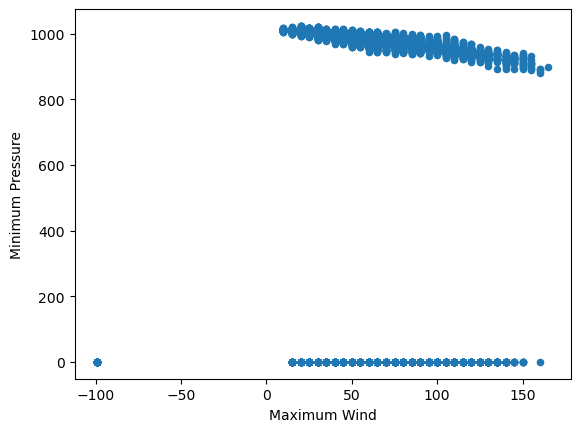

In [7]:
atlantic_data.plot(kind ='scatter', x = 'Maximum Wind', y='Minimum Pressure')

<Axes: xlabel='Longitude', ylabel='Latitude'>

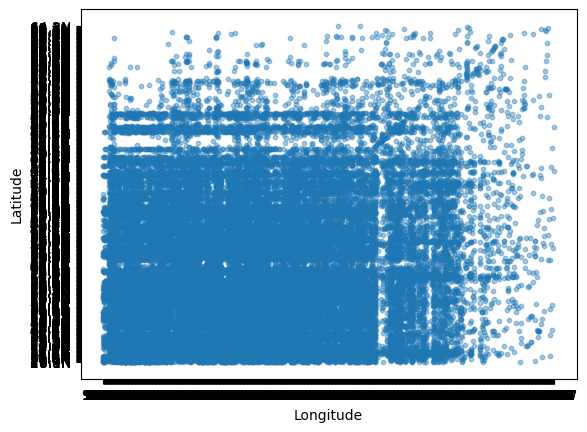

In [8]:
atlantic_data.plot(kind ='scatter', x = 'Longitude', y='Latitude',alpha =0.4, s=10)

<Axes: xlabel='Longitude', ylabel='Latitude'>

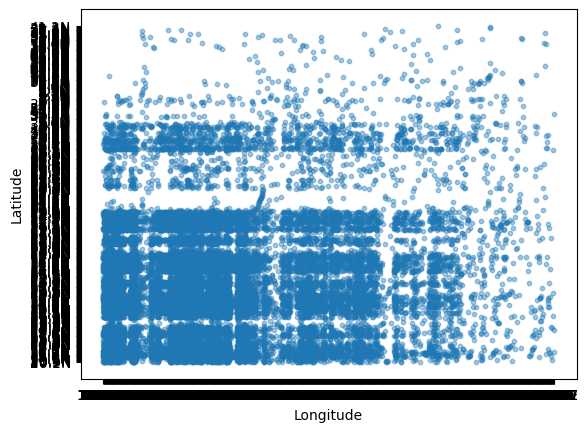

In [9]:
pacific_data.plot(kind='scatter', x='Longitude', y='Latitude', alpha =0.4, s=10)

<Axes: xlabel='Maximum Wind', ylabel='Minimum Pressure'>

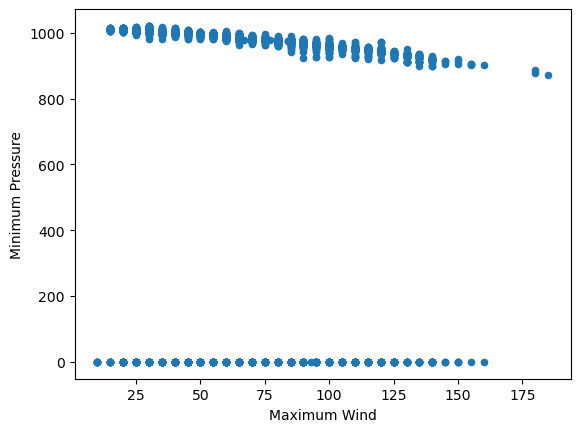

In [10]:
pacific_data.plot(kind='scatter', x='Maximum Wind', y='Minimum Pressure')

Atlantic Data - Histograms


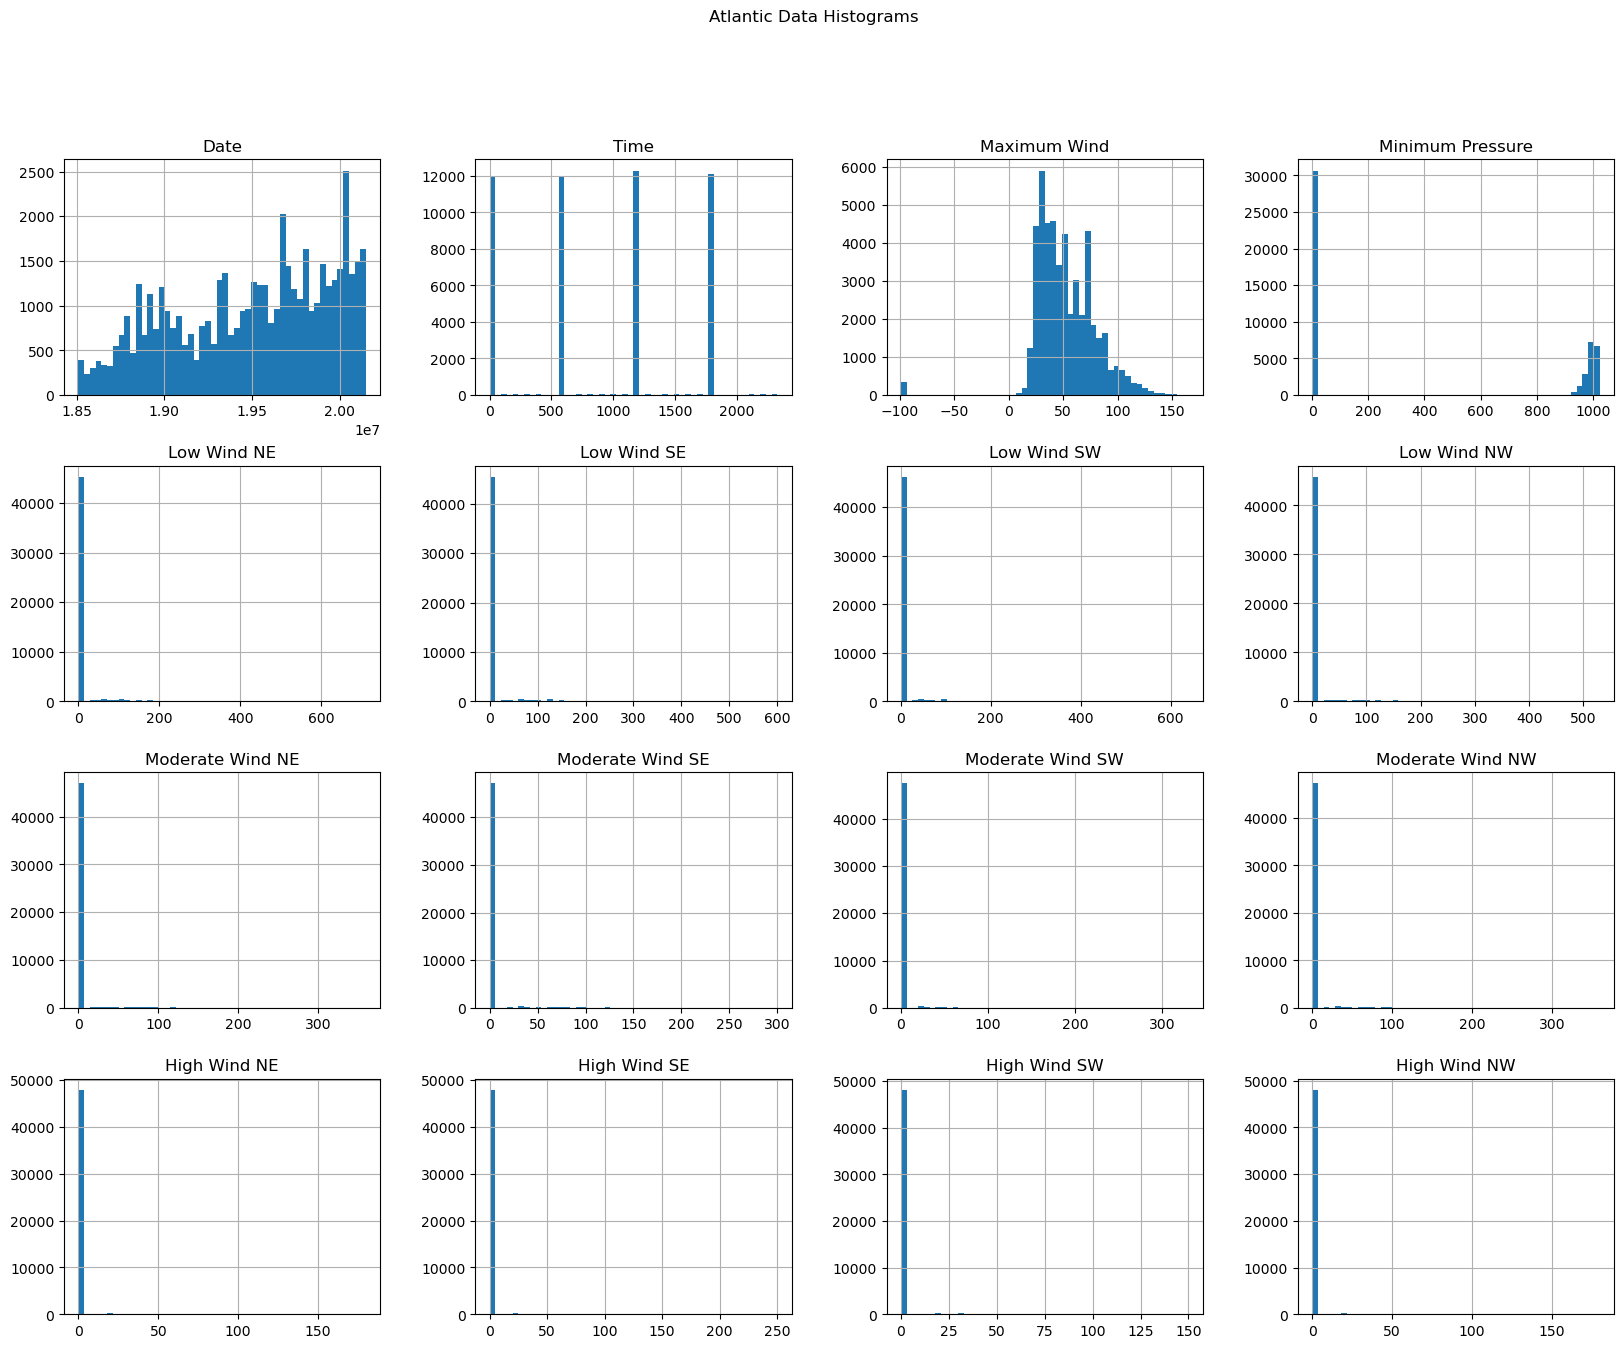

In [11]:
print("Atlantic Data - Histograms")
atlantic_data.hist(bins=50, figsize=(20, 15))
plt.suptitle("Atlantic Data Histograms")
plt.show()

Pacific Data - Histograms


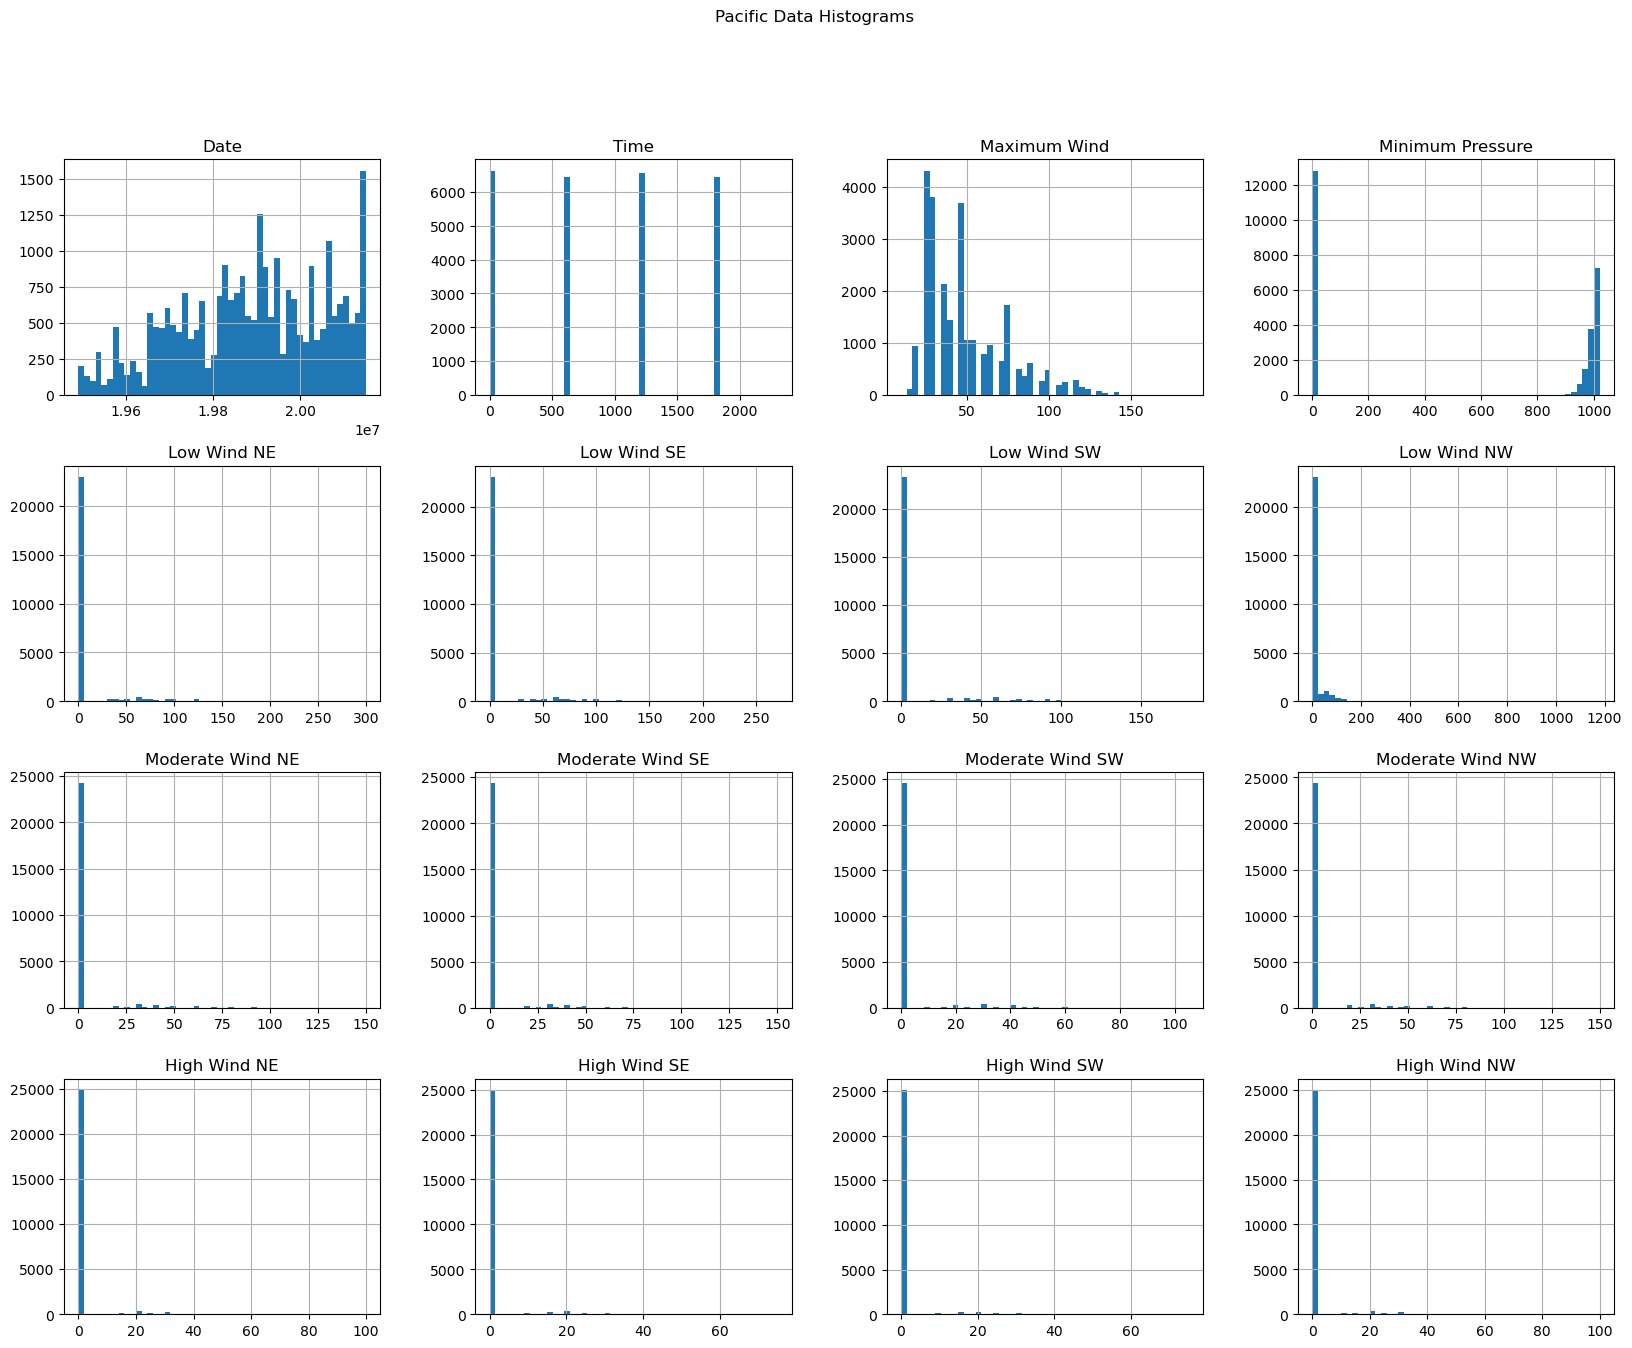

In [12]:
print("Pacific Data - Histograms")
pacific_data.hist(bins=50, figsize=(20, 15))
plt.suptitle("Pacific Data Histograms")
plt.show()
